# Music Genre Classification

In [ ]:
# Step 1: Load necessary libraries
# librosa, numpy, pandas, sklearn, etc.
import librosa
import numpy as np
import pandas as pd
import sklearn
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 2: Define a function to extract music features
# You may consider MFCC, Chroma STFT, Spectral Contrast, Zero Crossing Rate, Tempo, etc
# Be sure to have the feature dimension as large as possible, to get higher performance
# librosa.feature and librosa.beat may contain many useful functions

def features_extraction(audio):
    y, sr = librosa.load(audio)

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)

    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_mean = np.mean(mfcc)
    mfcc_var = np.var(mfcc)

    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_var = np.var(rms)

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    cent_mean = np.mean(cent)
    cent_var = np.var(cent)

    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))

    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo = np.mean(librosa.feature.tempo(onset_envelope=onset_env, sr=sr))

    har_y = librosa.effects.harmonic(y)
    tonnetz = np.mean(librosa.feature.tonnetz(y=har_y, sr=sr))

    feature_vector = [chroma_stft_mean, chroma_stft_var, mfcc_mean, mfcc_var, spectral_contrast, zcr,
              cent_mean, cent_var, rms_mean, rms_var, tempo, tonnetz]
    return feature_vector


In [ ]:
# Step 3: Iterate through each genre folder and extract features for each song
# Remember to mount Google Drive before accessing the dataset
# Useful python funtions: os.listdir, pandas.DataFrame

path = "/content/drive/MyDrive/GTZAN/genres"
data = {"labels":[], "feature":[]}
for label_index, filename in enumerate(os.listdir(path)):
  class_dir = path+"/"+filename
  for file in os.listdir(class_dir):
    data["labels"].append(label_index)
    file_path = class_dir+"/"+file
    data["feature"].append(features_extraction(file_path))
df = pd.DataFrame(data, columns = ["labels","feature"])
df.to_csv('/content/data.csv', index=False)


In [ ]:
# Step 4: Split the dataset into training and testing sets
# sklearn.model_selection has useful train_test_split function
# Use test_size=0.2, random_state=42
# Remember to normalize features using one of the scalers in sklearn.preprocessing
X = np.array(data["feature"])
y = np.array(data["labels"])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2, random_state=42)
train_scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = train_scaler.transform(X_train)

test_scaler = sklearn.preprocessing.StandardScaler().fit(X_test)
X_test = test_scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(800, 12)
(200, 12)


In [ ]:
# Step 5: Train and evaluate the model using sklearn
# You can replace RandomForestClassifier with other classifiers if needed
# classifier.fit trains the model
# classifier.predict make predictions
# sklearn has confusion_matrix, classification_report, accuracy_score, etc for evaluation
# Remember to save the extracted features for future
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


KN = KNeighborsClassifier(10)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(300)

# Kneighbors
KN.fit(X_train,y_train)
kn_acc = accuracy_score(y_test,KN.predict(X_test))
print(f"Accuracy: {kn_acc}")
print("Confusion Matrix:\n", confusion_matrix(y_test, KN.predict(X_test)))
print("Classicfication report:\n", classification_report(y_test, KN.predict(X_test)))

# Decision Tree
DT.fit(X_train,y_train)
DT_acc = accuracy_score(y_test,DT.predict(X_test))
print(f"Accuracy: {DT_acc}")
print("Confusion Matrix:\n", confusion_matrix(y_test, DT.predict(X_test)))
print("Classicfication report:\n", classification_report(y_test, DT.predict(X_test)))

# Random Forest
RF.fit(X_train,y_train)
RF_acc = accuracy_score(y_test,RF.predict(X_test))
print(f"Accuracy: {RF_acc}")
print("Confusion Matrix:\n", confusion_matrix(y_test, RF.predict(X_test)))
print("Classicfication report:\n", classification_report(y_test, RF.predict(X_test)))





Accuracy: 0.545
Confusion Matrix:
 [[ 9  0  2  2  1  2  0  1  2  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 6  1 12  1  0  0  0  2  2  3]
 [ 0  0  1 12  0  2  3  1  1  1]
 [ 0  0  0  0  7  2  2  4  0  0]
 [ 2  0  0  0  0 18  0  1  1  0]
 [ 0  1  0  1  4  0 15  2  1  1]
 [ 0  1  1  2  0  0  1  8  0  0]
 [ 2  0  3  2  1  6  1  3  5  0]
 [ 2  2  2  3  0  1  0  1  0 10]]
Classicfication report:
               precision    recall  f1-score   support

           0       0.43      0.45      0.44        20
           1       0.72      1.00      0.84        13
           2       0.57      0.44      0.50        27
           3       0.52      0.57      0.55        21
           4       0.54      0.47      0.50        15
           5       0.58      0.82      0.68        22
           6       0.68      0.60      0.64        25
           7       0.35      0.62      0.44        13
           8       0.42      0.22      0.29        23
           9       0.62      0.48      0.54        21

    accuracy 

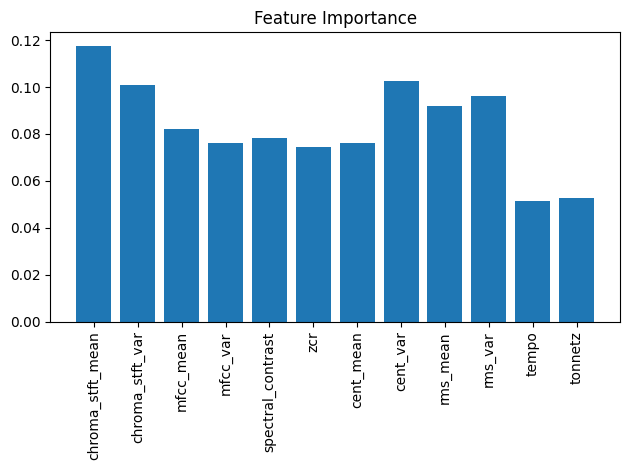

In [ ]:
# Step 6: Plot feature importance
# Get feature importance through classifier.feature_importances_
# Plot with matplotlib.pyplot library
import matplotlib.pyplot as plt

importances = RF.feature_importances_

ft = ["chroma_stft_mean", "chroma_stft_var", "mfcc_mean", "mfcc_var", "spectral_contrast", "zcr",
    "cent_mean", "cent_var", "rms_mean", "rms_var", "tempo", "tonnetz"]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), ft, rotation=90)
plt.tight_layout()
plt.show()




In [ ]:
import scipy
df = pd.read_csv('data.csv')
data = {"labels":[], "feature":[]}
data["labels"]= df.labels.to_numpy()
data["feature"]= df.feature.to_numpy()

In [ ]:
# Step 7: Retrieve similar songs and different songs
# IPython.display shows the song
# Remember to normalize your features!
# preprocessing.scale could be useful
import IPython.display as ipd
import scipy

vector_list = data["feature"]
dist = {"pos":[], "val":[]}

for pos_x, vec_x in enumerate(vector_list):
  vec_x = np.fromstring(vec_x[1:-1], dtype=float, sep=',')
  for pos_y, vec_y in enumerate(vector_list):
    if pos_x != pos_y:
      pos = np.array([pos_x,pos_y])
      pos = np.sort(pos)
      dist["pos"].append(pos)
      vec_y = np.fromstring(vec_y[1:-1], dtype=float, sep=',')
      distance = scipy.spatial.distance.cosine(vec_x,vec_y)
      dist["val"].append(distance)



In [ ]:
position = np.array(dist["pos"])
value = np.array(dist["val"])

min = []
max = []
for i in range(1000):
  arr = value[999*i:(999*(i+1))]
  arr = np.sort(arr)
  min.append(np.sum(arr[:5]))
  max.append(np.sum(arr[-5:]))

print(np.argmin(min))
print(np.argmax(max))

611
156


# Find the position of songs which are most similar and most different

In [ ]:
min_arr = value[999*611:(999*(611+1))]
max_arr = value[999*156:(999*(156+1))]
index_min = np.argsort(min_arr)[:4]
index_max = np.argsort(max_arr)[-4:]

print(index_min)
print(index_max)

print(position[999*611+629],position[999*611+638],position[999*611+635],position[999*611+683])
print(position[999*156+652],position[999*156+655],position[999*156+323],position[999*156+781])

[629 638 635 683]
[652 655 323 781]
[611 630] [611 639] [611 636] [611 684]
[156 653] [156 656] [156 324] [156 782]


In [ ]:
# By the position the most similar songs are:

path = "/content/drive/MyDrive/GTZAN/genres"
song_1 = path+"/jazz/jazz.00011.wav"
ipd.display(ipd.Audio(song_1))
song_2 = path+"/jazz/jazz.00030.wav"
ipd.display(ipd.Audio(song_2))
song_3 = path+"/jazz/jazz.00039.wav"
ipd.display(ipd.Audio(song_3))
song_4 = path+"/jazz/jazz.00036.wav"
ipd.display(ipd.Audio(song_4))
song_5 = path+"/jazz/jazz.00084.wav"
ipd.display(ipd.Audio(song_5))

In [ ]:
# By the position the most different songs are:

path = "/content/drive/MyDrive/GTZAN/genres"
song_1 = path+"/jazz/jazz.00053.wav"
ipd.display(ipd.Audio(song_1))
song_2 = path+"/pop/pop.00082.wav"
ipd.display(ipd.Audio(song_2))
song_3 = path+"/country/country.00056.wav"
ipd.display(ipd.Audio(song_3))
song_4 = path+"/disco/disco.00024.wav"
ipd.display(ipd.Audio(song_4))
song_5 = path+"/metal/metal.00056.wav"
ipd.display(ipd.Audio(song_5))

# Using ResNet for image classicfication of spectrogram

In [ ]:
# Step 8: Implement your new ideas!

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torch.optim import lr_scheduler
import torch.nn.functional as F
import torch.optim as optim
import time
import copy
import os


import warnings
warnings.filterwarnings("ignore")

class Block(nn.Module):
    def __init__(self, in_channels, out_channels, downsample):
        super().__init__()
        if downsample:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=(1, 1), stride=(2, 2), bias=False),
                nn.BatchNorm2d(out_channels,eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
        else:
            self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
            self.shortcut = nn.Sequential()

        self.bn1 = nn.BatchNorm2d(out_channels, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels,eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

    def forward(self, input):
        shortcut = self.shortcut(input)
        input = nn.ReLU()(self.bn1(self.conv1(input)))
        input = nn.ReLU()(self.bn2(self.conv2(input)))
        input = input + shortcut
        return nn.ReLU()(input)


class Net(nn.Module):
    def __init__(self, resblock, outputs=10):
        super().__init__()
        self.layer0 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.layer1 = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.layer2 = nn.ReLU(inplace=True)
        self.layer3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        self.layer4 = nn.Sequential(resblock(64, 64, downsample=False))
        self.layer5 = nn.Sequential(resblock(64, 128, downsample=True))
        self.layer6 = nn.Sequential(resblock(128, 256, downsample=True))
        self.layer7 = nn.Sequential(resblock(256, 512, downsample=True))

        self.fc = nn.Linear(25088, outputs)

    def forward(self, input):
        input = self.layer0(input)
        input = self.layer1(input)
        input = self.layer2(input)
        input = self.layer3(input)
        input = self.layer4(input)
        input = self.layer5(input)
        input = self.layer6(input)
        input = self.layer7(input)
        input = torch.flatten(input, start_dim=1)
        input = self.fc(input)
        probs = F.softmax(input, dim=1)


        return input,probs

Try to use LeNet for alternative

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()

    self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Sigmoid(),
            )
    self.classifier = nn.Sequential(
            nn.Linear(in_features=288120, out_features=84),
            nn.Sigmoid(),
            nn.Linear(in_features=84, out_features=10)
            )

  def forward(self, x):
    x = self.net(x)
    x = torch.flatten(x, 1)
    logits = self.classifier(x)
    probs = F.softmax(logits, dim=1)
    return logits, probs

Preprocessing data

In [ ]:
# Data augmentation
data_transforms =transforms.Compose([
                  transforms.Resize((224, 224)),
                  transforms.ToTensor(),
                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

data_dir = '/content/drive/MyDrive/GTZAN/images'

dataset = datasets.ImageFolder(os.path.join(data_dir),data_transforms)

train_length = int(len(dataset)*0.8)
test_length = int(len(dataset))-train_length

train_dataset,test_dataset=torch.utils.data.random_split(dataset,[train_length,test_length])

train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)
class_names = dataset.classes

if torch.cuda.is_available():
     device = "cuda"
     print("using cuda")
else:
     device = "cpu"

using cuda


In [ ]:
def train_model(model, criterion, optimizer, num_epochs=10):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # Forward
        outputs, probs = model(inputs)
        _, preds = torch.max(probs, 1)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        # Backward
        loss.backward()
        optimizer.step()
        total += labels.size(0)
        correct += (preds == labels).sum().item()
    epoch_acc = correct / total
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Training Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    print()
    return model, optimizer, epoch_loss

In [ ]:
def val_model(model, criterion, optimizer, num_epochs=10):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # Forward
        outputs,probs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(probs, 1)

        running_loss += loss.item() * inputs.size(0)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    epoch_acc = correct / total
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Testing Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    print()
    return model, epoch_loss, epoch_acc

In [ ]:
def training_loop(model,criterion,optimizer,epochs):
  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  # set objects for storing metrics
  train_loss = []
  val_loss = []
  # Train model
  for epoch in range(0, epochs):
    print(f'Epoch: {epoch+1}\t')
    # training
    model, optimizer, t_loss = train_model(model, criterion, optimizer, num_epochs=10)
    train_loss.append(train_loss)

    # # validation
    with torch.no_grad():
      model, v_loss, acc = val_model(model, criterion, optimizer, num_epochs=epochs)
      val_loss.append(v_loss)

    if acc > best_acc:
      best_acc = acc
      best_model_wts = copy.deepcopy(model.state_dict())

  print(f'Best val Acc: {best_acc:4f}')
  model.load_state_dict(best_model_wts)

  return train_loss,val_loss

In [ ]:
if __name__ == '__main__':
  model = Net(Block).to(device)
  # model = LeNet().to(device)
  optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  criterion = nn.CrossEntropyLoss()
  t_loss, v_loss = training_loop(model, criterion, optimizer,30)

Epoch: 1	
Training Loss: 8.3713 Acc: 0.1762

Testing Loss: 1.6838 Acc: 0.1700

Epoch: 2	
Training Loss: 4.0818 Acc: 0.2773

Testing Loss: 1.0916 Acc: 0.2500

Epoch: 3	
Training Loss: 4.5453 Acc: 0.3383

Testing Loss: 5.0065 Acc: 0.2050

Epoch: 4	
Training Loss: 4.5811 Acc: 0.3123

Testing Loss: 0.7879 Acc: 0.3000

Epoch: 5	
Training Loss: 2.8532 Acc: 0.3884

Testing Loss: 1.1508 Acc: 0.3100

Epoch: 6	
Training Loss: 2.3342 Acc: 0.4615

Testing Loss: 0.3618 Acc: 0.4800

Epoch: 7	
Training Loss: 2.4620 Acc: 0.4595

Testing Loss: 0.5899 Acc: 0.3800

Epoch: 8	
Training Loss: 1.8651 Acc: 0.5325

Testing Loss: 0.3999 Acc: 0.5000

Epoch: 9	
Training Loss: 2.2509 Acc: 0.5265

Testing Loss: 0.5122 Acc: 0.4550

Epoch: 10	
Training Loss: 1.7853 Acc: 0.5826

Testing Loss: 0.3298 Acc: 0.5400

Epoch: 11	
Training Loss: 1.8338 Acc: 0.5756

Testing Loss: 0.2547 Acc: 0.6700

Epoch: 12	
Training Loss: 1.3443 Acc: 0.6537

Testing Loss: 0.1569 Acc: 0.7350

Epoch: 13	
Training Loss: 1.0852 Acc: 0.7007

Tes

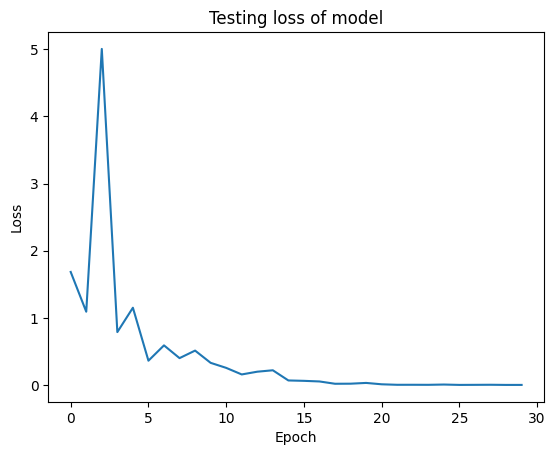

In [ ]:
# Plotting out loss curve
import matplotlib.pyplot as plt

plt.title("Testing loss of model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(v_loss, label='Testing Loss')
plt.show()

# Evaluating model performance

In [ ]:
def visualize_model(model, num_images=10):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    pre_class = []

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs,probs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)

            if (predicted.cpu().numpy()[0]) in pre_class:
              continue

            for j in range(inputs.size()[0]):

                if (predicted.cpu().numpy()[0]) in pre_class:
                  break

                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[predicted.cpu().numpy()[0]]}')
                img = inputs.cpu().data[j]
                img = img.swapaxes(0, 1)
                img = img.swapaxes(1, 2)
                plt.figure(figsize=(8, 4))
                plt.imshow(img,aspect='auto')
                plt.show()
                pre_class.append(predicted.cpu().numpy()[0])


                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


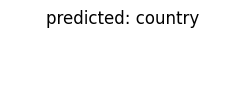

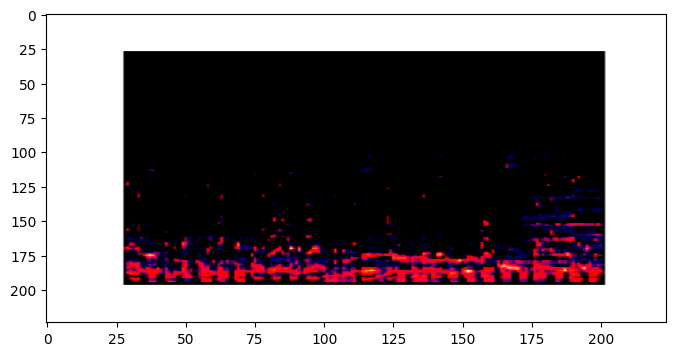

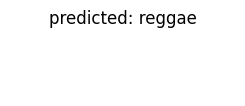

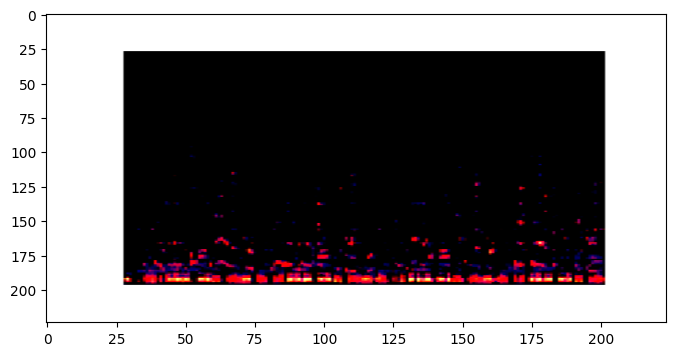

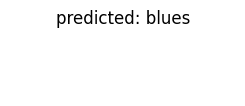

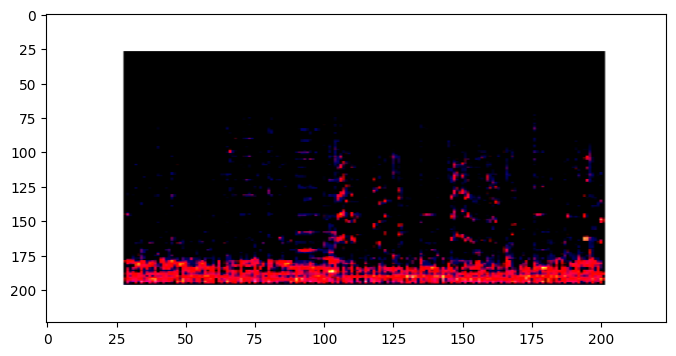

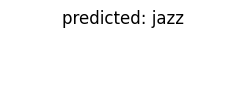

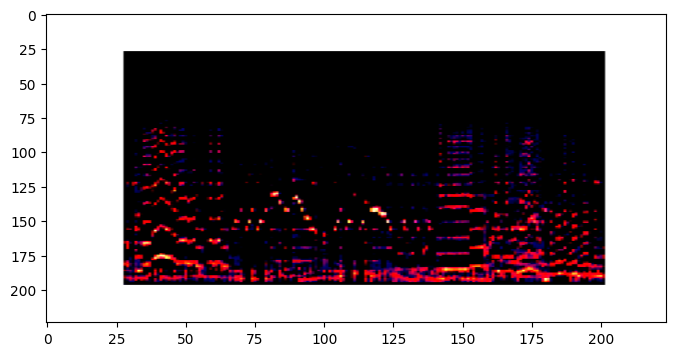

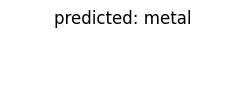

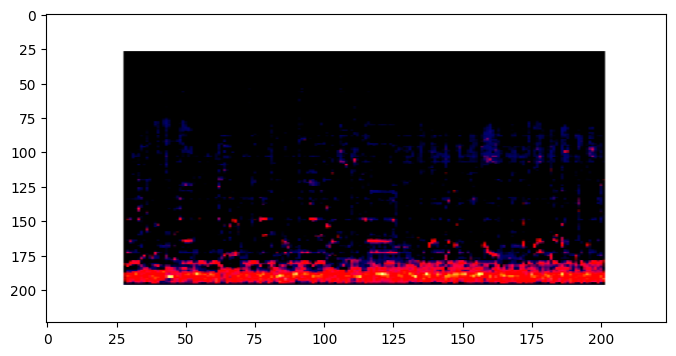

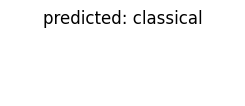

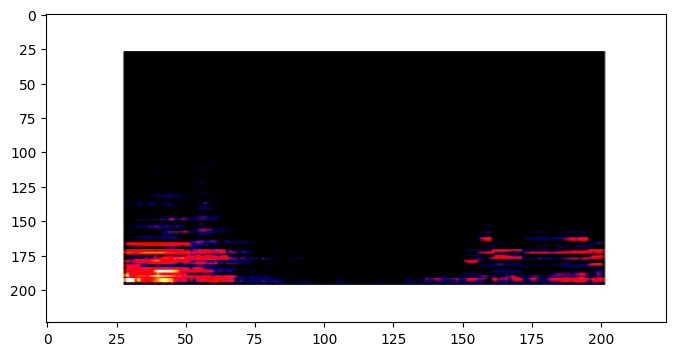

In [ ]:
visualize_model(model)

In [ ]:
from PIL import Image
transform = transforms.Compose([transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
def predicting(path):
  img = Image.open((os.path.join(path))).convert("RGB")
  tensor = transform(img)
  tensor = tensor.cuda()
  tensor = tensor.unsqueeze(0)
  prediction, prob = model(tensor)
  _, predicted = torch.max(prediction.data, 1)
  label = class_names[predicted.cpu().numpy()[0]]
  print("The prediction by spectrogram image is: "+label)

  return label

# Displaying music with prediction

In [ ]:
import IPython.display as ipd

audio_path = "/content/drive/MyDrive/GTZAN/genres"
img_path = "/content/drive/MyDrive/GTZAN/images"


# Blues
print("Ground truth is blues")
song_blues = audio_path+"/blues/blues.00000.wav"
spectrogram_blues = img_path+"/blues/blues00000.png"
pred = predicting(spectrogram_blues)
ipd.display(ipd.Audio(song_blues))

# Classical
print("Ground truth is classical")
song_classical = audio_path+"/classical/classical.00000.wav"
spectrogram_classical = img_path+"/classical/classical00000.png"
pred = predicting(spectrogram_classical)
ipd.display(ipd.Audio(song_classical))

# Country
print("Ground truth is country")
song_country = audio_path+"/country/country.00000.wav"
spectrogram_country = img_path+"/country/country00000.png"
pred = predicting(spectrogram_country)
ipd.display(ipd.Audio(song_country))

# Disco
print("Ground truth is disco")
song_disco = audio_path+"/disco/disco.00000.wav"
spectrogram_disco = img_path+"/disco/disco00000.png"
pred = predicting(spectrogram_disco)
ipd.display(ipd.Audio(song_disco))

# Hiphop
print("Ground truth is hiphop")
song_hiphop = audio_path+"/hiphop/hiphop.00000.wav"
spectrogram_hiphop = img_path+"/hiphop/hiphop00000.png"
pred = predicting(spectrogram_hiphop)
ipd.display(ipd.Audio(song_hiphop))

# Jazz
print("Ground truth is jazz")
song_jazz = audio_path+"/jazz/jazz.00000.wav"
spectrogram_jazz = img_path+"/jazz/jazz00000.png"
pred = predicting(spectrogram_jazz)
ipd.display(ipd.Audio(song_jazz))

# Metal
print("Ground truth is metal")
song_metal = audio_path+"/metal/metal.00000.wav"
spectrogram_metal = img_path+"/metal/metal00000.png"
pred = predicting(spectrogram_metal)
ipd.display(ipd.Audio(song_metal))

# Pop
print("Ground truth is pop")
song_pop = audio_path+"/pop/pop.00000.wav"
spectrogram_pop = img_path+"/pop/pop00000.png"
pred = predicting(spectrogram_pop)
ipd.display(ipd.Audio(song_pop))

# Reggae
print("Ground truth is reggae")
song_reggae = audio_path+"/reggae/reggae.00000.wav"
spectrogram_reggae = img_path+"/reggae/reggae00000.png"
pred = predicting(spectrogram_reggae)
ipd.display(ipd.Audio(song_reggae))

# Rock
print("Ground truth is rock")
song_rock = audio_path+"/rock/rock.00000.wav"
spectrogram_rock = img_path+"/rock/rock00000.png"
pred = predicting(spectrogram_rock)
ipd.display(ipd.Audio(song_rock))
